# ORDINARY LEAST SQUARES (OLS)

This notebook is based primarily on QuantEcon's introductory course (https://python.quantecon.org/ols.html)

Data: Daron Acemoglu, Simon Johnson, and James A Robinson. The colonial origins of comparative development: an empirical investigation. The American Economic Review, 91(5):1369–1401, 2001.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [28]:
df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')

Let's take  quick look at what we're working with.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   shortnam  163 non-null    object 
 1   euro1900  154 non-null    float32
 2   excolony  162 non-null    float32
 3   avexpr    121 non-null    float32
 4   logpgp95  148 non-null    float32
 5   cons1     88 non-null     float32
 6   cons90    88 non-null     float32
 7   democ00a  87 non-null     float32
 8   cons00a   91 non-null     float32
 9   extmort4  87 non-null     float32
 10  logem4    87 non-null     float32
 11  loghjypl  123 non-null    float32
 12  baseco    64 non-null     float32
dtypes: float32(12), object(1)
memory usage: 10.2+ KB


In [3]:
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df1.describe() 

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
count,154.000000,162.000000,121.000000,148.000000,88.000000,88.000000,87.000000,91.000000,87.000000,87.000000,123.000000,64.0
mean,30.466232,0.666667,7.066490,8.302507,3.590909,3.636364,1.149425,1.857143,220.926392,4.595984,-1.731106,1.0
std,42.389839,0.472866,1.804287,1.105342,2.414688,2.339967,2.576858,1.823131,411.498260,1.303333,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0
25%,0.000000,0.000000,5.886364,7.376192,1.000000,1.750000,0.000000,1.000000,68.350006,4.224609,-2.741120,1.0
50%,1.950000,1.000000,7.045455,8.265764,3.000000,3.000000,0.000000,1.000000,85.000000,4.442651,-1.560648,1.0
75%,91.625000,1.000000,8.272727,9.216228,7.000000,7.000000,1.000000,1.000000,253.259995,5.610119,-0.831277,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,0.000000,1.0


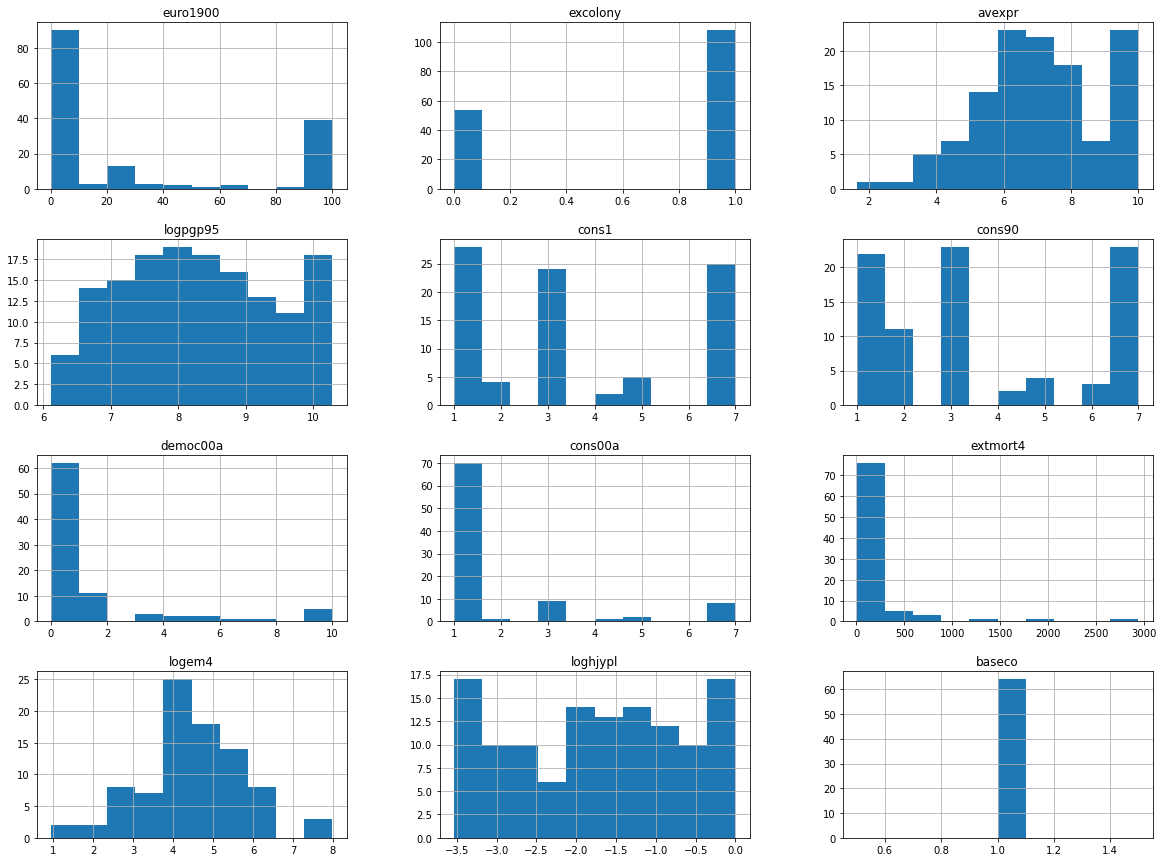

In [9]:
df1.hist(figsize = (20,15))
plt.show()

Now, we will explore relationships between variables on the dataset and run the regression with the Statsmodels API:

    GDP per capita (logpgp95) and protection against expropriation (avexpr)

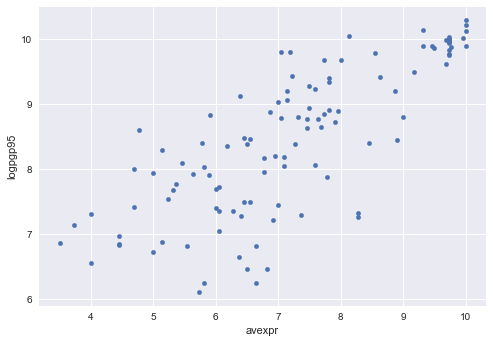

In [14]:
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

In [109]:
df1["cnst"] = 1 # creates constant variable (or bias term)

In [88]:
model = sm.OLS(df1["logpgp95"], df1[["cnst", "avexpr"]], missing='drop').fit() # fits a linear model on the variables

In [89]:
print(model.summary2()) # gets the results of the model. 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.608   
Dependent Variable: logpgp95         AIC:                243.4182
Date:               2021-07-26 07:31 BIC:                248.8373
No. Observations:   111              Log-Likelihood:     -119.71 
Df Model:           1                F-statistic:        171.4   
Df Residuals:       109              Prob (F-statistic): 4.16e-24
R-squared:          0.611            Scale:              0.51542 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
cnst         4.6261     0.3006   15.3908   0.0000   4.0304   5.2218
avexpr       0.5319     0.0406   13.0934   0.0000   0.4514   0.6124
-----------------------------------------------------------------
Omnibus:               9.251        Durbin-Watson:          1.689
Prob(Omnibus):   

Resulting OLS equation:    $\hat{logpgp95} = 4,63 + {0,53}avexpr $.  Around 61% of the variation in logpgp95 in explained by avexpr. Both the constant variable and the protection against expropriation tested significant on determining GDP per capita (using p < 0,05 to reject the null hypothesis).

Finally, we'll plot our estimated (fitted) values from the regression and the actual (observed) values from the dataset.

In [90]:
predictions = model.predict()

In [92]:
df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

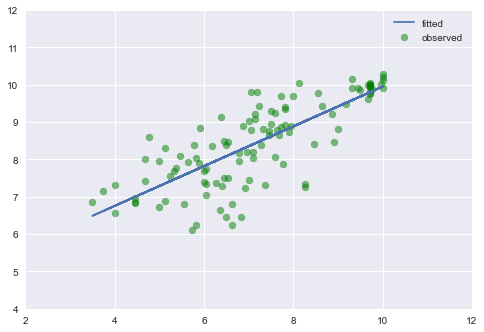

In [108]:
plt.scatter(df1["avexpr"], df1["logpgp95"], label = "observed", alpha = 0.5, c = "green")
plt.plot(df1_plot["avexpr"], predictions, label = "fitted")

plt.legend()
plt.axis([2,12,4,12])

plt.show()